# superfamily dedection

## Importation

In [ ]:
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
)


In [52]:
pip install torch torchvision torchaudio

   ---------------------------------------- 0.0/197.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/197.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/197.9 MB 960.0 kB/s eta 0:03:27
   ---------------------------------------- 0.1/197.9 MB 1.3 MB/s eta 0:02:33
   ---------------------------------------- 0.1/197.9 MB 1.4 MB/s eta 0:02:17
   ---------------------------------------- 0.2/197.9 MB 1.0 MB/s eta 0:03:15
   ---------------------------------------- 0.2/197.9 MB 1.0 MB/s eta 0:03:16
   ---------------------------------------- 0.2/197.9 MB 958.6 kB/s eta 0:03:27
   ---------------------------------------- 0.3/197.9 MB 907.8 kB/s eta 0:03:38
   ---------------------------------------- 0.3/197.9 MB 907.8 kB/s eta 0:03:38
   ---------------------------------------- 0.3/197.9 MB 907.8 kB/s eta 0:03:38
   ---------------------------------------- 0.3/197.9 MB 728.0 kB/s eta 0:04:32
   ---------------------------------------- 0.4/197.9 MB 791.2 kB/

In [54]:
pip install torch-geometric

     ---------------------------------------- 0.0/64.2 kB ? eta -:--:--
     ------ --------------------------------- 10.2/64.2 kB ? eta -:--:--
     ------------ ------------------------- 20.5/64.2 kB 217.9 kB/s eta 0:00:01
     ------------------ ------------------- 30.7/64.2 kB 186.2 kB/s eta 0:00:01
     ------------------------------------ - 61.4/64.2 kB 297.7 kB/s eta 0:00:01
     -------------------------------------- 64.2/64.2 kB 246.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.1 MB 2.6 MB/s eta 0:00:01
   ---- ----------------------------------- 0.1/1.1 MB 1.8 MB/s eta 0:00:01
   ---- ----------------------------------- 0.1/1.1 MB 1.8 MB/s eta 0:00:01
   ------- -------------------------------- 0.2/1.1 MB 985.7 kB/s eta 0:00:01
   ------- -------------------------------- 0.2/1.1 MB 985.7 kB/s eta 0:00:01
   ------- -------------------------------- 0.2/1.1 MB 985.7 kB/s eta 0:00:01
   -

In [56]:
import torch
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool

In [1]:
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.utils import plot_model

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
import pickle

In [4]:
%pip install Bio

Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec

In [6]:
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.svm import SVC

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns
from keras.regularizers import l2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [8]:
from joblib import load,dump
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split,cross_val_score
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, Flatten, MaxPooling2D,Conv1D, MaxPooling1D
from tensorflow.keras import regularizers

In [9]:
# import torch
# from torch.utils.data import DataLoader, TensorDataset
# from transformers import BertTokenizer, BertForSequenceClassification, AdamW
%pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [10]:
from Bio import SeqIO
from lazypredict.Supervised import LazyClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [11]:
pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [12]:
path_data="data/"
path_famille = "data/Familles/"
path_model = "data/models/ml_multiclass/"
path_model_dl = "data/models/dl_multiclass/"

In [66]:
from sklearn.preprocessing import LabelEncoder

## read/visualisation dataset

### Function Read data

In [13]:
import pandas as pd

def read_fasta(file_path, classname):
    with open(file_path, 'r') as file:
        # Read lines from the file
        lines = file.readlines()

    # Initialize empty lists to store sequence IDs and sequences
    sequence_ids = []
    sequences = []
    names = []
    lengths = []

    # Initialize variables to store the current sequence ID and sequence
    current_sequence_id = None
    current_sequence = []

    # Iterate through the lines in the file
    for line in lines:
        line = line.strip().lower()

        # Check if the line is a header line (starts with '>')
        if line.startswith('>'):
            # If a sequence is already being processed, store it
            if current_sequence_id is not None:
                full_sequence = ''.join(current_sequence)
                sequence_ids.append(current_sequence_id)
                sequences.append(full_sequence)
                names.append(classname)
                lengths.append(len(full_sequence))

            # Update current sequence ID
            current_sequence_id = line[1:]
            # Reset current sequence
            current_sequence = []
        else:
            # Append the sequence line to the current sequence
            current_sequence.append(line)

    # Add the last sequence to the lists
    if current_sequence_id is not None:
        full_sequence = ''.join(current_sequence)
        sequence_ids.append(current_sequence_id)
        sequences.append(full_sequence)
        names.append(classname)
        lengths.append(len(full_sequence))

    # Create a DataFrame with sequence IDs and sequences
    df = pd.DataFrame({'Sequence_ID': sequence_ids, 'Sequence': sequences, 'Classname': names, 'Sequence Length': lengths})
    return df


In [14]:
import pandas as pd

def read_fasta2(file_path, classname):
    with open(file_path, 'r') as file:
        # Read lines from the file
        lines = file.readlines()

    # Initialize empty lists to store sequence IDs and sequences
    sequence_ids = []
    sequences = []
    names = []
    lengths = []

    # Initialize variables to store the current sequence ID and sequence
    current_sequence_id = None
    current_sequence = []

    # Iterate through the lines in the file
    for line in lines:
        # line = line.strip().lower()

        # Check if the line is a header line (starts with '>')
        if line.startswith('>'):
            # If a sequence is already being processed, store it
            if current_sequence_id is not None:
                full_sequence = ''.join(current_sequence)
                sequence_ids.append(current_sequence_id)
                sequences.append(full_sequence)
                names.append(classname)
                lengths.append(len(full_sequence))

            # Update current sequence ID
            current_sequence_id = line[1:]
            # Reset current sequence
            current_sequence = []
        else:
            # Append the sequence line to the current sequence
            current_sequence.append(line)

    # Add the last sequence to the lists
    if current_sequence_id is not None:
        full_sequence = ''.join(current_sequence)
        sequence_ids.append(current_sequence_id)
        sequences.append(full_sequence)
        names.append(classname)
        lengths.append(len(full_sequence))

    # Create a DataFrame with sequence IDs and sequences
    df = pd.DataFrame({'Sequence_ID': sequence_ids, 'Sequence': sequences,  'Classname': names, 'Sequence Length': lengths})
    return df


### read data

In [15]:
ET_d = read_fasta(path_data+"element_transposable.fasta",'ET') #for transposable elements label 1
dataX=read_fasta2(path_data+"repbaseclasse2.fasta", 'ET')

In [16]:
print("ET_d.shape\t",ET_d.shape,
      "\ndataX.shape\t",dataX.shape)

ET_d.shape	 (5741, 4) 
dataX.shape	 (9597, 4)


In [17]:
p_element_d=read_fasta( path_famille+"P_element.fasta",'ET') 
TC1_MARINER_d=read_fasta( path_famille+"TC1_MARINER.fasta",'ET') 
hAT_d=read_fasta( path_famille+"hAT.fasta",'ET') 
hAT_d_2=read_fasta( path_famille+"hAT1.fasta",'ET') 
piggyBac_d=read_fasta( path_famille+"piggyBac.fasta",'ET') 
piggyBac__d=read_fasta( path_famille+"piggyBac_.fasta",'ET') 
piggyBac_d_2=read_fasta( path_famille+"PiggyBac1.fasta",'ET') 
Merlin_d=read_fasta( path_famille+"merlindata.fasta",'ET') 
merlin_d_2=read_fasta( path_famille+"merlindata_2.fasta",'ET') 
P_element_d_2=read_fasta( path_famille+"P_element2.fasta",'ET') 
P_element_d_3=read_fasta( path_famille+"sequencesPelemnt.fasta",'ET')
PiggyBacNew_d=read_fasta( path_famille+"PiggyBacNew.fasta",'ET') 
MutatorNew_d=read_fasta( path_famille+"MutatorNew.fasta",'ET') 
CACTANew_d=read_fasta( path_famille+"CACTANew.fasta",'ET') 
ETDfam_d=read_fasta( path_data+"ETDfam.fasta",'ET') 
ETDfam2_d=read_fasta( path_data+"ETDfam2.fasta",'ET') 
ETDfam3_d=read_fasta( path_data+"ETDfam3.fasta",'ET') 
ETDfam4_d=read_fasta( path_data+"ETDfam4.fasta",'ET') 
ETDfam5_d=read_fasta( path_data+"ETDfam5.fasta",'ET') 
ETDfam6_d=read_fasta( path_data+"ETDfam6.fasta",'ET') 
ETDfam7_d=read_fasta( path_data+"ETDfam7.fasta",'ET') 
ETDfam8_d=read_fasta( path_data+"ETDfam8.fasta",'ET') 
ETDfam9_d=read_fasta( path_data+"ETDfam9.fasta",'ET') 
ETDfam10_d=read_fasta( path_data+"ETDfam10.fasta",'ET') 
p_ele_d=read_fasta( path_famille+"p_ele_d.fasta",'ET')

In [18]:
ET_totalData=pd.concat([
                        ET_d, 
                        dataX,
                        p_ele_d,
                        TC1_MARINER_d,hAT_d_2,
                        p_element_d,
                        hAT_d,piggyBac_d,piggyBac__d,
                        Merlin_d, 
                        P_element_d_2,
                        P_element_d_3,
                        PiggyBacNew_d,piggyBac_d_2,MutatorNew_d,
                        CACTANew_d,
                        merlin_d_2,
                        ETDfam_d,ETDfam2_d,ETDfam3_d,ETDfam4_d,ETDfam5_d,ETDfam6_d,ETDfam7_d,ETDfam8_d,ETDfam9_d,ETDfam10_d
                        ], 
                       axis=0, ignore_index=True)

In [19]:
ET_totalData.shape

(139346, 4)

## Pre-processing

### Pre-processing Functions

In [20]:
def dataPreprocessing(data):
  tc1=0
  p=0
  MuDR=0
  hAT=0
  PiggyBac=0
  Merlin=0
  CACTA=0

  for i in data:
    if  "\tmariner/tc1".casefold() in i.casefold() :
        tc1+=1
    if  "kw=DNA/TcMar-Mariner.".casefold() in i.casefold() :
        tc1+=1

    if "\tP\t".casefold() in i.casefold() :
        p+=1
    if "KW=DNA/P.".casefold() in i.casefold() :
        p+=1
    if "kw=dna/p-fungi.".casefold() in i.casefold() :
        p+=1

    if "\tMuDR\t".casefold() in i.casefold() :
        MuDR+=1
    if "KW=DNA/MULE-MuDR.".casefold() in i.casefold() :
        MuDR+=1
    if "KW=DNA/PiggyBac.".casefold() in i.casefold() :
        PiggyBac+=1
    if "\thAT\t".casefold() in i.casefold() :
        hAT+=1
    if "KW=DNA/hAT".casefold() in i.casefold() :
        hAT+=1
    if "tc1-mariner_mite".casefold() in i.casefold() :
        tc1+=1
    if 'P_MITE'.casefold() in i.casefold() :
        p+=1
    if 'dna-transposon, tir, p'.casefold() in i.casefold() :
        p+=1

    if  'Mutator'.casefold()  in i.casefold() :
        MuDR+=1
    if  ' dna-transposon, tir, Mutator'.casefold()  in i.casefold() :
        MuDR+=1
    if "\tPiggyBac\t".casefold() in i.casefold():
        PiggyBac+=1
    if " dna-transposon, tir, PiggyBac".casefold() in i.casefold():
        PiggyBac+=1
    if "\tMerlin\t".casefold() in i.casefold():
        Merlin+=1
    if "merlin".casefold() in i.casefold():
        Merlin+=1
    if "kw=DNA/Merlin.".casefold() in i.casefold():
        Merlin+=1
    if "Mer [organism=drosophila".casefold() in i.casefold():
        Merlin+=1
    if "CACTA\t".casefold() in i.casefold():
        CACTA+=1
    if "DNA-transposon, TIR, CACTA".casefold() in i.casefold():
        CACTA+=1
    

  print("TC1_MARINER_MITE : ", tc1)
  print("P : ", p)
  print("HAT : ", hAT)
  print("PiggyBac : ", PiggyBac)
  print("Mutator : ", MuDR)
  print("Merlin : ", Merlin)
  print("CACTA : ", CACTA)

In [21]:
def dropDuplicates(data):
  print("old shape=",data.shape)
  df_unique = data.drop_duplicates(subset='Sequence')
  print("new shape=",df_unique.shape)
  return df_unique

In [22]:
def eliminateDataless(data):

    # Convert 'Sequence_ID' to lowercase for case-insensitive comparison
    data['Sequence_ID_lower'] = data['Sequence_ID'].str.casefold()

    # Define conditions for each category
    conditions = {
        "TC1_Mariner": (data['Sequence_ID_lower'].str.contains("\tmariner/tc1") & (data['Sequence Length'] >= 1300)) |
                            (data['Sequence_ID_lower'].str.contains("tc1-mariner_mite") & (data['Sequence Length'] >= 1300)) |
        (data['Sequence_ID_lower'].str.contains("kw=dna/tcmar-mariner.") & (data['Sequence Length'] >= 1300))  ,

        "P_Element": (data['Sequence_ID_lower'].str.contains("\tp\t") & (data['Sequence Length'] >= 2900)) |
             (data['Sequence_ID_lower'].str.contains('p_mite') & (data['Sequence Length'] >= 2900)) |
             (data['Sequence_ID_lower'].str.contains(' dna-transposon, tir, p') & (data['Sequence Length'] >= 2900)) |
              (data['Sequence_ID_lower'].str.contains('kw=dna/p.') & (data['Sequence Length'] >= 2900)) |
        (data['Sequence_ID_lower'].str.contains('kw=dna/p-fungi.') & (data['Sequence Length'] >= 2900))
              ,

        "MuDR": (data['Sequence_ID_lower'].str.contains("\tmudr\t") & (data['Sequence Length'] >= 4000)) |
                (data['Sequence_ID_lower'].str.contains('mutator') & (data['Sequence Length'] >= 4000)) |
                (data['Sequence_ID_lower'].str.contains(" dna-transposon, tir, mutator")   & (data['Sequence Length'] >= 4000)) |
                (data['Sequence_ID_lower'].str.contains("kw=dna/mule-mudr.")   & (data['Sequence Length'] >= 4000)),

        "HAT": (data['Sequence_ID_lower'].str.contains("\that\t") & (data['Sequence Length'] >= 2000))|
        (       data['Sequence_ID_lower'].str.contains("kw=dna/hat") & (data['Sequence Length'] >= 2000)),

        "PiggyBac": data['Sequence_ID_lower'].str.contains("\tpiggybac\t") |
                    data['Sequence_ID_lower'].str.contains(" dna-transposon, tir, piggybac") |
                    data['Sequence_ID_lower'].str.contains("kw=dna/piggybac.c"),

        "Merlin": data['Sequence_ID_lower'].str.contains("\tmerlin\t") |
                  data['Sequence_ID_lower'].str.contains("mer \[organism=drosophila") |
                  data['Sequence_ID_lower'].str.contains("merlin") |
                  data['Sequence_ID_lower'].str.contains("kw=dna/merlin."),

        "CACTA":( data['Sequence_ID_lower'].str.contains("cacta\t") & (data['Sequence Length'] >= 3000))|
                ( data['Sequence_ID_lower'].str.contains("dna-transposon, tir, casta") & (data['Sequence Length'] >= 3000) )
    }
    # Define label mapping
    labels = {
        "TC1_Mariner": 1,
        "P_Element": 2,
        "MuDR": 3,
        "HAT": 4,
        "PiggyBac": 5,
        "Merlin": 6,
        "CACTA": 7
    }

    # Filter the data based on conditions and add a new column for the category
    filtered_data = pd.DataFrame()
    for category, condition in conditions.items():
        temp_data = data[condition].copy()
        temp_data['Category'] = category
        temp_data['Label'] = labels[category]
        filtered_data = pd.concat([filtered_data, temp_data], ignore_index=True)

    # Drop the auxiliary column used for case-insensitive matching
    filtered_data.drop(columns=['Sequence_ID_lower'], inplace=True)
    # Calculate counts for each condition
    tc1 = data[conditions['TC1_Mariner']].shape[0]
    p = data[conditions['P_Element']].shape[0]
    MuDR = data[conditions['MuDR']].shape[0]
    hAT = data[conditions['HAT']].shape[0]
    PiggyBac = data[conditions['PiggyBac']].shape[0]
    Merlin = data[conditions['Merlin']].shape[0]
    CACTA = data[conditions['CACTA']].shape[0]

    # Print results
    print("TC1_Mariner : ", tc1)
    print("P_Element : ", p)
    print("HAT : ", hAT)
    print("PiggyBac : ", PiggyBac)
    print("Mutator/MuDR : ", MuDR)
    print("Merlin : ", Merlin)
    print("CACTA : ", CACTA)

    return filtered_data




In [23]:
def substituer_nucl(seqs) :
  new_seqs = []
  for seq in seqs :
    s = list(seq)
    for i in range(0, len(s)) :
        if s[i] not in ['a','t','c','g'] :
            s[i] = 'z'
    new_seqs.append(''.join(s))
  return new_seqs

In [24]:

def Kmers_funct(seq, size):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

In [25]:

def join_kmers(seqs) :
  x = seqs
  for item in range(len(seqs)):
      x[item] = ' '.join(x[item])
  return x

### Data pre-processing


In [26]:
dataPreprocessing(ET_totalData['Sequence_ID'])

TC1_MARINER_MITE :  9138
P :  6589
HAT :  109285
PiggyBac :  5663
Mutator :  3391
Merlin :  4222
CACTA :  1083


In [27]:
afterdropdup=dropDuplicates(ET_totalData)

old shape= (139346, 4)
new shape= (132525, 4)


In [28]:
dataPreprocessing(afterdropdup['Sequence_ID'])

TC1_MARINER_MITE :  7478
P :  4043
HAT :  107534
PiggyBac :  5277
Mutator :  3387
Merlin :  3988
CACTA :  1080


In [29]:
filtered_data = eliminateDataless(afterdropdup)

TC1_Mariner :  1848
P_Element :  775
HAT :  9131
PiggyBac :  757
Mutator/MuDR :  614
Merlin :  2085
CACTA :  488


In [30]:
filtered_data.shape

(15698, 6)

In [31]:
ET_d_=filtered_data.iloc[:,1:]

In [32]:
ET_d_=ET_d_.sample(frac=1)

In [33]:
ET_d_['Category'].value_counts()

Category
HAT            9131
Merlin         2085
TC1_Mariner    1848
P_Element       775
PiggyBac        757
MuDR            614
CACTA           488
Name: count, dtype: int64

In [34]:
# Step 1: Extract all rows for 'P' and 'Merlin'
# p_merlin_data = ET_d_[ET_d_['Category'].isin(['P', 'Merlin'])]

# Step 2: Define the desired number of samples for each category
desired_counts = {
    "TC1_Mariner": min(ET_d_['Category'].value_counts()),
    "HAT":  min(ET_d_['Category'].value_counts()),
    "PiggyBac":  min(ET_d_['Category'].value_counts()),
    "MuDR":  min(ET_d_['Category'].value_counts()),
    "CACTA":  min(ET_d_['Category'].value_counts()),
    "P_Element": min(ET_d_['Category'].value_counts()),
    "Merlin": min(ET_d_['Category'].value_counts()),
}

# Step 3: Sample the rows for each of the specified categories, with checks
sampled_data_list = []

for category, count in desired_counts.items():
    available_count = ET_d_[ET_d_['Category'] == category].shape[0]
    if available_count >= count:
        sampled_data = ET_d_[ET_d_['Category'] == category].sample(n=count, random_state=42)
        sampled_data_list.append(sampled_data)
    else:
        print(f"Not enough data to sample {count} rows from category {category}. Available: {available_count}")

# Combine all sampled data
sampled_data = pd.concat(sampled_data_list)

# Combine the data
# final_data = pd.concat([p_merlin_data, sampled_data])

# Verify the counts
final_class_counts = sampled_data['Category'].value_counts()

print(final_class_counts)
print("Total count:", sampled_data.shape[0])

Category
TC1_Mariner    488
HAT            488
PiggyBac       488
MuDR           488
CACTA          488
P_Element      488
Merlin         488
Name: count, dtype: int64
Total count: 3416


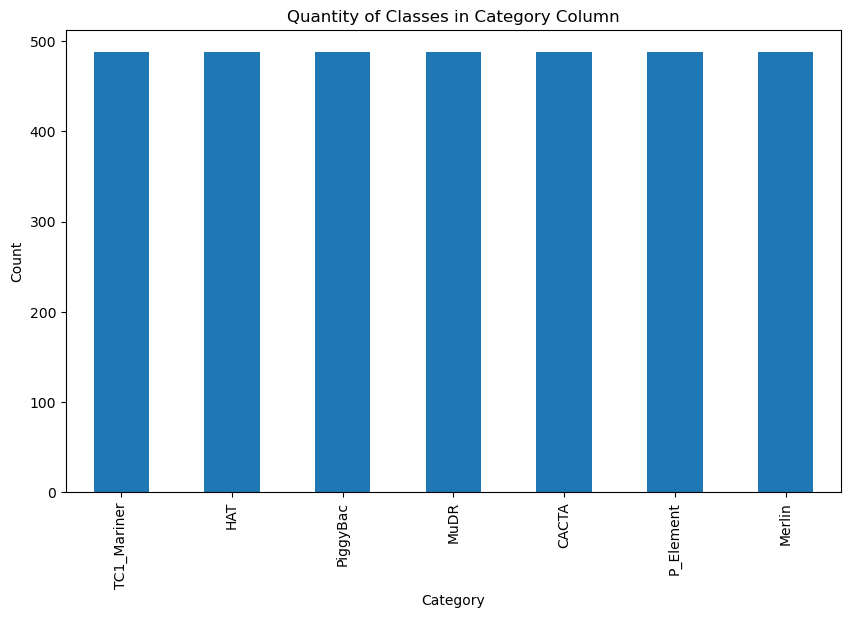

In [35]:

# Plot the class counts
final_class_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Quantity of Classes in Category Column')
plt.show()


In [36]:
Labled_data =sampled_data

In [37]:
Labled_data.shape

(3416, 5)

In [38]:
Labled_data=Labled_data.sample(frac=1).reset_index(drop=True)
Labled_data.head()

,Sequence,Classname,Sequence Length,Category,Label
0,ttaaaggtgtaatgtgtaagatcgtgctacttgctccacctccata...,ET,6276,P_Element,2
1,tggtaacactttacaataaggttcattagttaacattagttaatgt...,ET,442,Merlin,6
2,ccctcgagcggtcgcgctggcgcactgagtgcgccatagttaaata...,ET,2570,PiggyBac,5
3,cactgtaaaaaatccaacttgacaaatgttgaaattgcttgatttt...,ET,6648,CACTA,7
4,gaggtaatttcacgttccaccaatctttcagaggattgttgcggag...,ET,5427,MuDR,3


In [39]:
counts = Labled_data['Label'].value_counts()
counts_dict = counts.to_dict()
counts_dict

{2: 488, 6: 488, 5: 488, 7: 488, 3: 488, 1: 488, 4: 488}

In [40]:
labels = list(counts_dict.keys())
values = list(counts_dict.values())

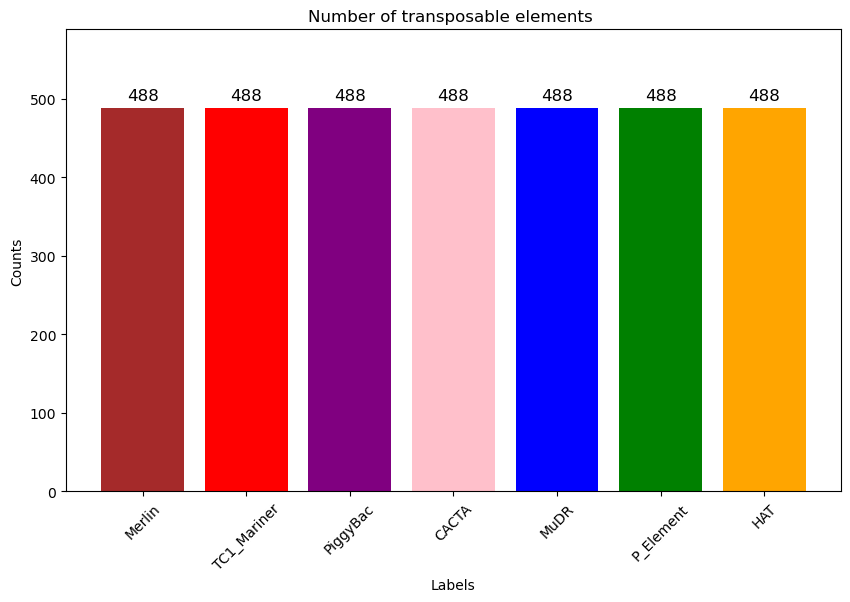

In [41]:
human_readable_labels = ["TC1_Mariner", "P_Element", "MuDR", "HAT", "PiggyBac", "Merlin", "CACTA"]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink'])
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Number of transposable elements ')
plt.xticks(labels, human_readable_labels, rotation=45)
plt.ylim(0, max(values) + 100)

# Adding the counts on top of the bars
for i in range(len(labels)):
    plt.text(labels[i], values[i] + 10, str(values[i]), ha='center', fontsize=12)

plt.show()

In [42]:
for seq in Labled_data['Sequence']:
    if 'z' in seq:
        display(Labled_data.loc[Labled_data['Sequence'] == seq])

## Knowledge discovery

### split data

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    Labled_data[['Sequence', 'Category']], Labled_data['Label'], test_size=0.20, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.20, random_state=42)

X_train.shape,y_train.shape , X_test.shape,y_test.shape, X_val.shape, y_val.shape

((2185, 2), (2185,), (684, 2), (684,), (547, 2), (547,))

### data vectorisation

In [102]:

k=6
# vectorizer=CountVectorizer()
# vecto="CountVectorizer"
vectorizer= TfidfVectorizer()
vecto="TfidfVectorizer"
# vectorizer=load("/kaggle/input/k6/other/default/2/tfidf_vectorizer_k6.joblib")

In [63]:

def select_features_and_to_dense(sequences_df, features_to_keep):
    features_to_keep=list(features_to_keep)
    return sequences_df[features_to_keep].values


#### train

In [103]:
sequences_train = [seq for seq in X_train['Sequence']]
sequences_train = substituer_nucl(sequences_train)
sequences_train = [Kmers_funct(i, size=k) for i in sequences_train]
sequences_train = join_kmers(sequences_train)
sequences_train = vectorizer.fit_transform(sequences_train)


In [76]:
sequences_train.shape

(2185, 125)

##### train pca

In [86]:
sequences_train_dense = sequences_train.todense()

# Create a DataFrame from the dense matrix
sequences_train_final = pd.DataFrame(sequences_train_dense)

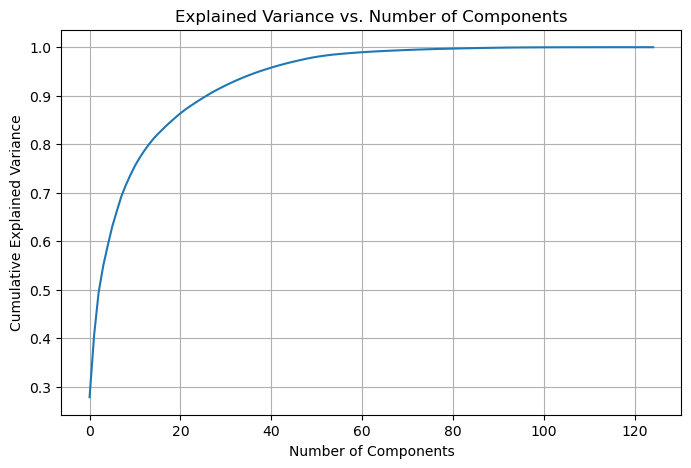

In [47]:
sequences_train_dense = sequences_train.todense()
sequences_train_dense_array = np.asarray(sequences_train_dense)
pca = PCA()
pca.fit(sequences_train_dense_array)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [48]:
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

print(f"Number of components to retain 95% variance: {n_components_95}")

Number of components to retain 95% variance: 39


In [49]:

pca = PCA(n_components=n_components_95)  # Adjust the number of components as needed
sequences_train_reduced = pca.fit_transform(sequences_train_dense_array)

# Convert the reduced matrix to a DataFrame
sequences_train_reduced_df = pd.DataFrame(sequences_train_reduced)


In [50]:
# Compute the correlation matrix
correlationMatrix = sequences_train_reduced_df.corr()


In [51]:
threshold = 0.8

# Dictionary to hold highly correlated feature pairs
highly_correlated_pairs = []

# Identify highly correlated pairs
for i in range(len(correlationMatrix.columns)):
    for j in range(i):
        if abs(correlationMatrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlationMatrix.columns[i], correlationMatrix.columns[j]))

# Set to hold features to keep
features_to_keep = set(correlationMatrix.columns)

# Remove one feature from each highly correlated pair
for feature1, feature2 in highly_correlated_pairs:
    if feature1 in features_to_keep and feature2 in features_to_keep:
        # Use domain knowledge or other criteria here to decide which to keep
        # For simplicity, let's keep the feature with the lower index
        features_to_keep.remove(feature2 if feature1 < feature2 else feature1)

# Final features to keep
# print("Features to keep:", features_to_keep)

# Filter the dataset to keep only the selected features
sequences_train_final = sequences_train_reduced_df[list(features_to_keep)]

In [72]:
sequences_train.shape

(2185, 125)

In [73]:
sequences_train_final.shape

(2185, 125)

#### save vectorizer & features to keep

In [54]:
with open(path+f'models/features_to_keep_data2_{vecto}_k='+str(k)+'.pkl', 'wb') as file:
    pickle.dump(features_to_keep, file)

In [55]:
dump(vectorizer, f"{path}models/{vecto}_data2_vectorizer_k={k}.joblib")

['data/models/CountVectorizer_vectorizer_k=6.joblib']

#### test

In [104]:
sequences_test = [seq for seq in X_test['Sequence']]
sequences_test = substituer_nucl(sequences_test)
sequences_test = [Kmers_funct(i, size=k) for i in sequences_test]
sequences_test = join_kmers(sequences_test)
sequences_test = vectorizer.transform(sequences_test)

In [87]:
sequences_test_dense = sequences_test.todense()

# Create a DataFrame from the dense matrix
sequences_test_final = pd.DataFrame(sequences_test_dense)

In [55]:

sequences_test_dense = sequences_test.todense()

# Create a DataFrame from the dense matrix
sequences_test_df = pd.DataFrame(sequences_test_dense)

sequences_test_final = sequences_test_df[list(features_to_keep)]


#### validation

In [105]:
sequences_val = [seq for seq in X_val['Sequence']]
sequences_val = substituer_nucl(sequences_val)
sequences_val = [Kmers_funct(i, size=k) for i in sequences_val]
sequences_val = join_kmers(sequences_val)
sequences_val = vectorizer.transform(sequences_val)

In [88]:
sequences_val_dense = sequences_val.todense()

# Create a DataFrame from the dense matrix
sequences_val_final = pd.DataFrame(sequences_val_dense)

In [57]:

sequences_val_dense = sequences_val.todense()

# Create a DataFrame from the dense matrix
sequences_val_df = pd.DataFrame(sequences_val_dense)

sequences_val_final = sequences_val_df[list(features_to_keep)]


### Machine learning

#### Random Forest

Evaluating k=3
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best parameters found: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 300}
	Train model
Epoch 1/30
	Training Accuracy: 0.9596794, Validation Accuracy: 0.6949292, Training Error: 0.6933597, Validation Error: 1.1451209
Epoch 2/30
	Training Accuracy: 0.9596794, Validation Accuracy: 0.6949292, Training Error: 0.6933597, Validation Error: 1.1451209
Epoch 3/30
	Training Accuracy: 0.9596794, Validation Accuracy: 0.6949292, Training Error: 0.6933597, Validation Error: 1.1451209
Epoch 4/30
	Training Accuracy: 0.9596794, Validation Accuracy: 0.6949292, Training Error: 0.6933597, Validation Error: 1.1451209
	Early stopping at epoch 4


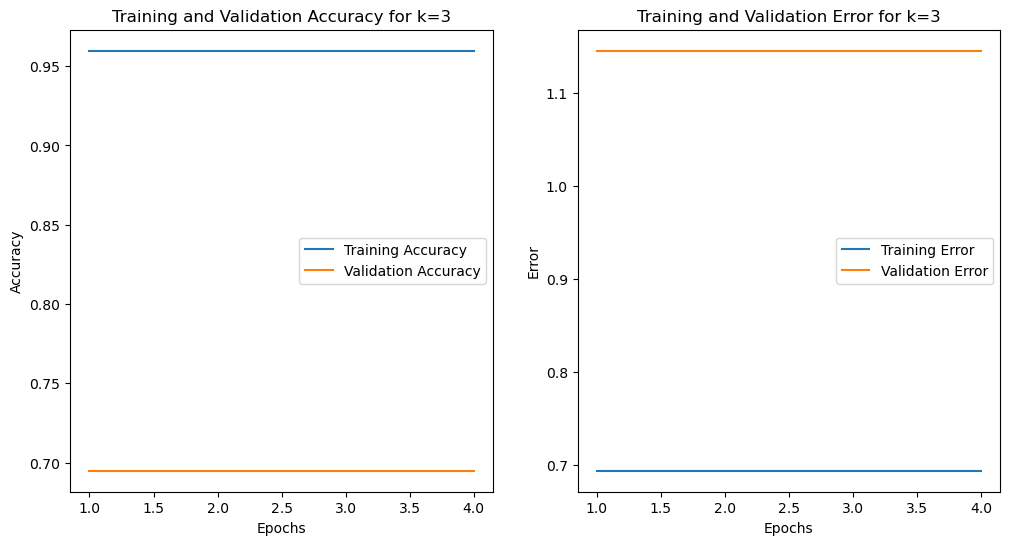

accuracy :  0.7149122807017544
              precision    recall  f1-score   support

           1       0.63      0.74      0.68       100
           2       0.58      0.58      0.58       104
           3       0.75      0.69      0.72        90
           4       0.63      0.46      0.53        94
           5       0.72      0.86      0.78        91
           6       0.94      0.86      0.90        99
           7       0.77      0.82      0.79       106

    accuracy                           0.71       684
   macro avg       0.72      0.71      0.71       684
weighted avg       0.72      0.71      0.71       684

	Confusion Matrix:


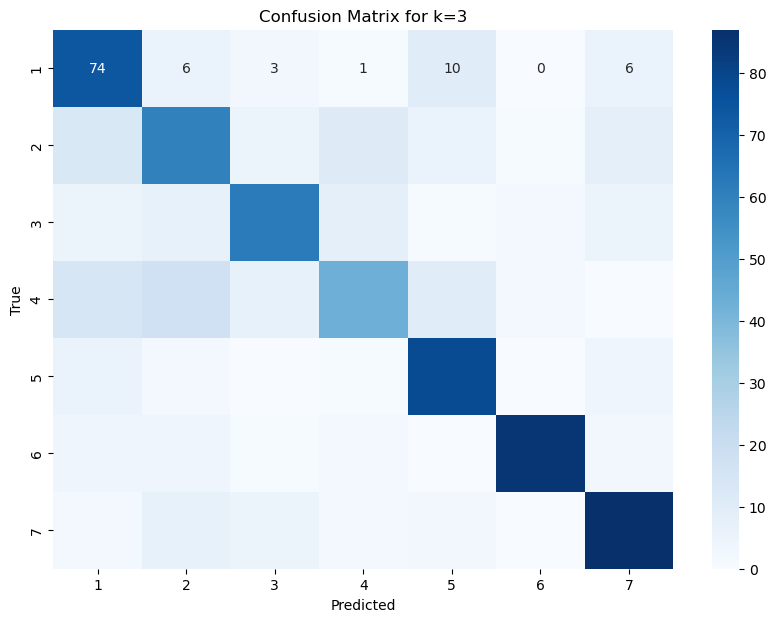

	Save model and vectorizer


In [62]:
def evaluate_kmers_RF(X_train, X_test, y_train, y_test, epochs, patience=3):
    print(f"===============================================================\nEvaluating k={k}")
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
# def evaluate_kmers_RF( X_train, X_test, y_train, y_test, X_val, y_val, vectorizer,epochs,patience=3):
    param_grid = {
        'n_estimators': [100, 300, 500],
        'max_features': ['sqrt', 'log2'],
        'max_depth' : [3,6,10],
        'min_samples_split': [6, 8, 10, 20],
        'min_samples_leaf': [2, 4, 12, 15],
        'bootstrap': [True, False]
    }
    model = RandomForestClassifier(random_state=42)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_log_loss')

    # Fit the model
    grid_search.fit(X_train, y_train)

    print(f"Best parameters found: {grid_search.best_params_}")
    best_params = grid_search.best_params_

    # Initialize the model with best parameters
    model = RandomForestClassifier(**best_params, random_state=42)

    train_accuracy = []
    val_accuracy = []
    train_loss = []
    val_loss = []
    best_val_acc = 0
    patience_counter = 0
    
    print("\t=======================================================================\n\tTrain model")


# Cross-validation setup
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    train_accuracy = []
    val_accuracy = []
    train_loss = []
    val_loss = []
    best_val_acc = 0
    patience_counter = 0

    for e in range(epochs):
        print(f"Epoch {e+1}/{epochs}")
        fold_train_acc = []
        fold_val_acc = []
        fold_train_loss = []
        fold_val_loss = []

        for train_index, val_index in skf.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

            model.fit(X_train_fold, y_train_fold)
            y_train_pred = model.predict(X_train_fold)
            y_val_pred = model.predict(X_val_fold)

            train_acc = accuracy_score(y_train_fold, y_train_pred)
            val_acc = accuracy_score(y_val_fold, y_val_pred)

            fold_train_acc.append(train_acc)
            fold_val_acc.append(val_acc)

            y_train_pred_proba = model.predict_proba(X_train_fold)
            y_val_pred_proba = model.predict_proba(X_val_fold)

            train_lo = log_loss(y_train_fold, y_train_pred_proba)
            val_lo = log_loss(y_val_fold, y_val_pred_proba)

            fold_train_loss.append(train_lo)
            fold_val_loss.append(val_lo)

        train_accuracy.append(np.mean(fold_train_acc))
        val_accuracy.append(np.mean(fold_val_acc))
        train_loss.append(np.mean(fold_train_loss))
        val_loss.append(np.mean(fold_val_loss))

        print(f"\tTraining Accuracy: {train_accuracy[-1]:.7f}, Validation Accuracy: {val_accuracy[-1]:.7f}, Training Error: {train_loss[-1]:.7f}, Validation Error: {val_loss[-1]:.7f}")

        # Early Stopping Logic
        if val_accuracy[-1] > best_val_acc:
            best_val_acc = val_accuracy[-1]
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"\tEarly stopping at epoch {e+1}")
            break
    # Ensure same lengths for plotting
    epochs = range(1, len(train_accuracy) + 1)
    if len(train_accuracy) != len(val_accuracy):
        print(f"Warning: Length mismatch between train and validation accuracy: {len(train_accuracy)} vs {len(val_accuracy)}")
    if len(train_loss) != len(val_loss):
        print(f"Warning: Length mismatch between train and validation loss: {len(train_loss)} vs {len(val_loss)}")

    # Plot training and validation accuracy & loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy for k={k}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, label='Training Error')
    plt.plot(epochs, val_loss, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title(f'Training and Validation Error for k={k}')
    plt.legend()

    plt.show()
    y_test_pred = model.predict(X_test)
    final_score = accuracy_score(y_test, y_test_pred)
    print("accuracy : ",final_score)
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix
    print("\t========================================================================\n\tConfusion Matrix:")

    labels = np.arange(1, 8)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred, labels=labels)
    
    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for k={k}')
    plt.show()

    print("\t========================================================================\n\tSave model and vectorizer")

    # dump(model, f"{path}models/classifierRF_tfidf_k={k}.joblib")
    dump(model, f"{path_model}_classifierRF_{vecto}_k={k}_multiclass.joblib")

X_train_concat = pd.concat([sequences_train_final, sequences_val_final])
y_train_concat = pd.concat([y_train, y_val])
evaluate_kmers_RF(X_train_concat, sequences_test_final, y_train_concat, y_test, epochs=30)


#### ExtraTreesClassifier

Evaluating k=3
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found: {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 200}
Epoch 1/30
	Training Accuracy: 0.9990130, Validation Accuracy: 0.6981332, Training Error: 0.5235551, Validation Error: 1.1565951
Epoch 2/30
	Training Accuracy: 0.9991924, Validation Accuracy: 0.7074703, Training Error: 0.5228665, Validation Error: 1.1553442
Epoch 3/30
	Training Accuracy: 0.9989231, Validation Accuracy: 0.6985007, Training Error: 0.5227145, Validation Error: 1.1551723
Epoch 4/30
	Training Accuracy: 0.9989231, Validation Accuracy: 0.7024369, Training Error: 0.5223373, Validation Error: 1.1535220
Epoch 5/30
	Training Accuracy: 0.9986540, Validation Accuracy: 0.6981410, Training Error: 0.5224183, Validation Error: 1.1551725
	Early stopping at epoch 5


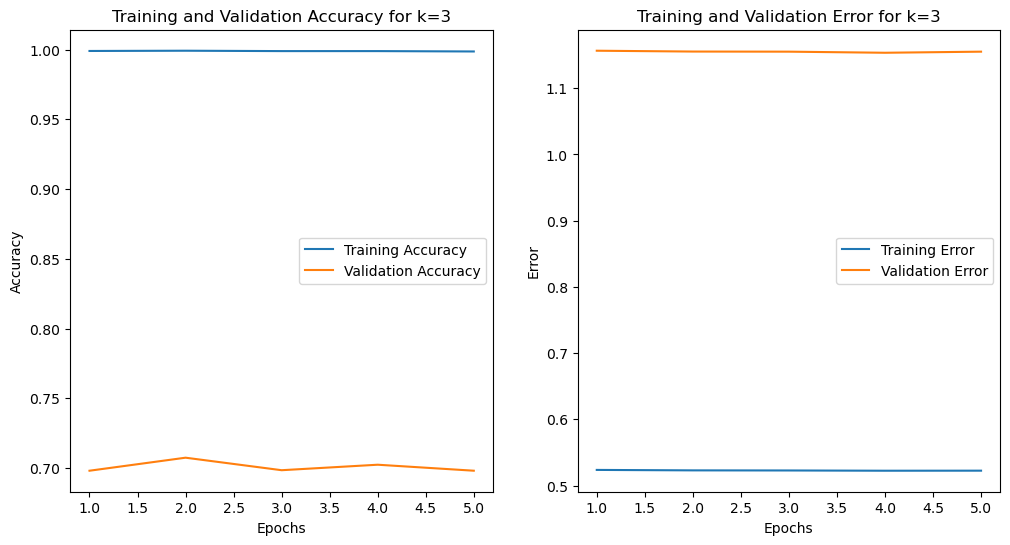

accuracy :  0.7002923976608187
              precision    recall  f1-score   support

           1       0.68      0.78      0.73       100
           2       0.53      0.62      0.57       104
           3       0.71      0.62      0.66        90
           4       0.55      0.44      0.49        94
           5       0.77      0.78      0.78        91
           6       0.86      0.86      0.86        99
           7       0.80      0.79      0.80       106

    accuracy                           0.70       684
   macro avg       0.70      0.70      0.70       684
weighted avg       0.70      0.70      0.70       684

	Confusion Matrix:


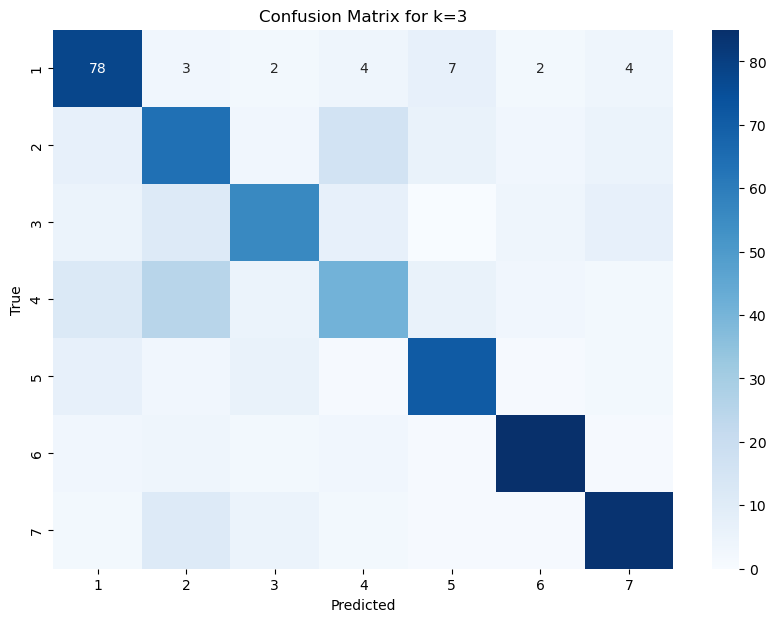

	Save model and vectorizer


In [63]:
def evaluate_kmers_ETC(X_train, X_test, y_train, y_test, epochs, patience=3):
    print(f"===============================================================\nEvaluating k={k}")

    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    # Initialize the ExtraTreesClassifier
    etc = ExtraTreesClassifier(random_state=42)

    # Define the parameter grid with more focus on regularization
    param_grid = {
        'n_estimators': [100, 200],
        'max_features': ['sqrt', 'log2'],
        'min_samples_split': [4, 6, 8],
        'min_samples_leaf': [2, 3, 4],
        'bootstrap': [True]
    }

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=etc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_log_loss')

    # Fit the model
    grid_search.fit(X_train, y_train)

    print(f"Best parameters found: {grid_search.best_params_}")
    best_params = grid_search.best_params_

    # Initialize the model with best parameters
    model = ExtraTreesClassifier(**best_params)

    # Cross-validation setup
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    train_accuracy = []
    val_accuracy = []
    train_loss = []
    val_loss = []
    best_val_acc = 0
    patience_counter = 0

    for e in range(epochs):
        print(f"Epoch {e+1}/{epochs}")
        fold_train_acc = []
        fold_val_acc = []
        fold_train_loss = []
        fold_val_loss = []

        for train_index, val_index in skf.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

            model.fit(X_train_fold, y_train_fold)
            y_train_pred = model.predict(X_train_fold)
            y_val_pred = model.predict(X_val_fold)

            train_acc = accuracy_score(y_train_fold, y_train_pred)
            val_acc = accuracy_score(y_val_fold, y_val_pred)

            fold_train_acc.append(train_acc)
            fold_val_acc.append(val_acc)

            y_train_pred_proba = model.predict_proba(X_train_fold)
            y_val_pred_proba = model.predict_proba(X_val_fold)

            train_lo = log_loss(y_train_fold, y_train_pred_proba)
            val_lo = log_loss(y_val_fold, y_val_pred_proba)

            fold_train_loss.append(train_lo)
            fold_val_loss.append(val_lo)

        train_accuracy.append(np.mean(fold_train_acc))
        val_accuracy.append(np.mean(fold_val_acc))
        train_loss.append(np.mean(fold_train_loss))
        val_loss.append(np.mean(fold_val_loss))

        print(f"\tTraining Accuracy: {train_accuracy[-1]:.7f}, Validation Accuracy: {val_accuracy[-1]:.7f}, Training Error: {train_loss[-1]:.7f}, Validation Error: {val_loss[-1]:.7f}")

        # Early Stopping Logic
        if val_accuracy[-1] > best_val_acc:
            best_val_acc = val_accuracy[-1]
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"\tEarly stopping at epoch {e+1}")
            break

    # Ensure same lengths for plotting
    epoch_range = range(1, len(train_accuracy) + 1)

    # Plot training and validation accuracy & loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epoch_range, train_accuracy, label='Training Accuracy')
    plt.plot(epoch_range, val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy for k={k}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epoch_range, train_loss, label='Training Error')
    plt.plot(epoch_range, val_loss, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title(f'Training and Validation Error for k={k}')
    plt.legend()

    plt.show()

    y_test_pred = model.predict(X_test)
    final_score = accuracy_score(y_test, y_test_pred)
    print("accuracy : ", final_score)
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix
    print("========================================================================\n\tConfusion Matrix:")

    labels = np.arange(1, 8)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred, labels=labels)
    
    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for k={k}')
    plt.show()

    print("========================================================================\n\tSave model and vectorizer")

    dump(model, f"{path_model}_classifierETC_{vecto}_k={k}_multiclass.joblib")




X_train_concat = pd.concat([sequences_train_final, sequences_val_final])
y_train_concat = pd.concat([y_train, y_val])
evaluate_kmers_ETC(X_train_concat, sequences_test_final, y_train_concat, y_test, epochs=30)

#### NB

Evaluating k=3
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters found: {'alpha': 0.0001}
Epoch 1/30
	Training Accuracy: 0.3731696, Validation Accuracy: 0.3598114, Training Error: 1.7763669, Validation Error: 1.7872217
Epoch 2/30
	Training Accuracy: 0.3731696, Validation Accuracy: 0.3598114, Training Error: 1.7763669, Validation Error: 1.7872217
Epoch 3/30
	Training Accuracy: 0.3731696, Validation Accuracy: 0.3598114, Training Error: 1.7763669, Validation Error: 1.7872217
Epoch 4/30
	Training Accuracy: 0.3731696, Validation Accuracy: 0.3598114, Training Error: 1.7763669, Validation Error: 1.7872217
	Early stopping at epoch 4


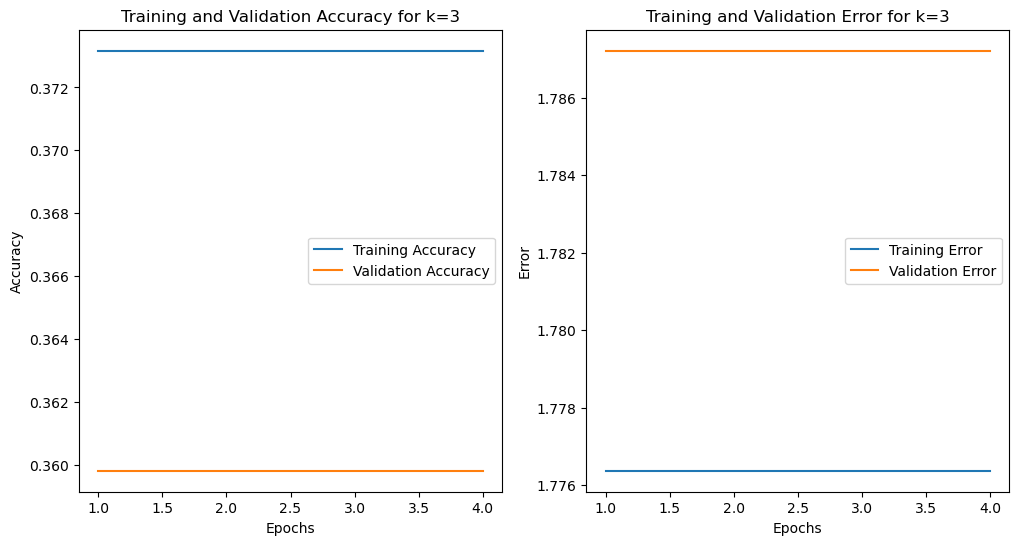

accuracy :  0.32456140350877194
              precision    recall  f1-score   support

           1       0.43      0.10      0.16       105
           2       0.42      0.27      0.33       102
           3       0.26      0.17      0.21        94
           4       0.38      0.25      0.30       107
           5       0.29      0.21      0.24        96
           6       0.84      0.67      0.75       101
           7       0.17      0.67      0.27        79

    accuracy                           0.32       684
   macro avg       0.40      0.33      0.32       684
weighted avg       0.41      0.32      0.32       684

	Confusion Matrix:


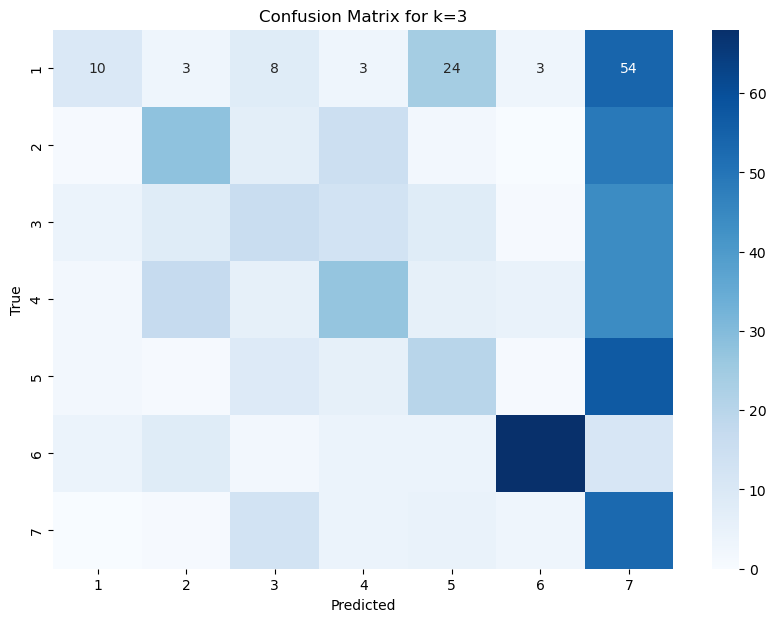

	Save model and vectorizer


In [89]:
def evaluate_kmers_NB(X_train, X_test, y_train, y_test, epochs, patience=3):
    print(f"===============================================================\nEvaluating k={k}")

    # smote = SMOTE(random_state=42)
    # X_train, y_train = smote.fit_resample(X_train, y_train)
    
    model = MultinomialNB()
    param_grid = {'alpha': [0.001, 0.0001,0.01, 0.1, 1.0, 2,10.0]}  # You can add more hyperparameters here
    


    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_log_loss')

    # Fit the model
    grid_search.fit(X_train, y_train)

    print(f"Best parameters found: {grid_search.best_params_}")
    best_params = grid_search.best_params_

    # Initialize the model with best parameters
    model = MultinomialNB(**best_params)

    # Cross-validation setup
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    train_accuracy = []
    val_accuracy = []
    train_loss = []
    val_loss = []
    best_val_acc = 0
    patience_counter = 0

    for e in range(epochs):
        print(f"Epoch {e+1}/{epochs}")
        fold_train_acc = []
        fold_val_acc = []
        fold_train_loss = []
        fold_val_loss = []

        for train_index, val_index in skf.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

            model.fit(X_train_fold, y_train_fold)
            y_train_pred = model.predict(X_train_fold)
            y_val_pred = model.predict(X_val_fold)

            train_acc = accuracy_score(y_train_fold, y_train_pred)
            val_acc = accuracy_score(y_val_fold, y_val_pred)

            fold_train_acc.append(train_acc)
            fold_val_acc.append(val_acc)

            y_train_pred_proba = model.predict_proba(X_train_fold)
            y_val_pred_proba = model.predict_proba(X_val_fold)

            train_lo = log_loss(y_train_fold, y_train_pred_proba)
            val_lo = log_loss(y_val_fold, y_val_pred_proba)

            fold_train_loss.append(train_lo)
            fold_val_loss.append(val_lo)

        train_accuracy.append(np.mean(fold_train_acc))
        val_accuracy.append(np.mean(fold_val_acc))
        train_loss.append(np.mean(fold_train_loss))
        val_loss.append(np.mean(fold_val_loss))

        print(f"\tTraining Accuracy: {train_accuracy[-1]:.7f}, Validation Accuracy: {val_accuracy[-1]:.7f}, Training Error: {train_loss[-1]:.7f}, Validation Error: {val_loss[-1]:.7f}")

        # Early Stopping Logic
        if val_accuracy[-1] > best_val_acc:
            best_val_acc = val_accuracy[-1]
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"\tEarly stopping at epoch {e+1}")
            break

    # Ensure same lengths for plotting
    epoch_range = range(1, len(train_accuracy) + 1)

    # Plot training and validation accuracy & loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epoch_range, train_accuracy, label='Training Accuracy')
    plt.plot(epoch_range, val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy for k={k}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epoch_range, train_loss, label='Training Error')
    plt.plot(epoch_range, val_loss, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title(f'Training and Validation Error for k={k}')
    plt.legend()

    plt.show()

    y_test_pred = model.predict(X_test)
    final_score = accuracy_score(y_test, y_test_pred)
    print("accuracy : ", final_score)
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix
    print("========================================================================\n\tConfusion Matrix:")

    labels = np.arange(1, 8)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred, labels=labels)
    
    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for k={k}')
    plt.show()

    print("========================================================================\n\tSave model and vectorizer")

    dump(model, f"{path_model}_classifierNB_{vecto}_k={k}_multiclass.joblib")
    # dump(model, f"{path}models/classifierNB_CV_k={k}.joblib")




X_train_concat = pd.concat([sequences_train_final, sequences_val_final])
y_train_concat = pd.concat([y_train, y_val])
evaluate_kmers_NB(X_train_concat, sequences_test_final, y_train_concat, y_test, epochs=30)

#### SVM

In [ ]:
def evaluate_kmers_SVM(X_train, X_test, y_train, y_test, epochs, patience=3):
    print(f"===============================================================\nEvaluating k={k}")

    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf','poly','linear']
    }
    model = SVC()
    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_log_loss')

    # Fit the model
    grid_search.fit(X_train, y_train)

    print(f"Best parameters found: {grid_search.best_params_}")
    best_params = grid_search.best_params_
    # Initialize the model with best parameters
    model = SVC(**best_params,probability=True)

    # Cross-validation setup
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    train_accuracy = []
    val_accuracy = []
    train_loss = []
    val_loss = []
    best_val_acc = 0
    patience_counter = 0

    for e in range(epochs):
        print(f"Epoch {e+1}/{epochs}")
        fold_train_acc = []
        fold_val_acc = []
        fold_train_loss = []
        fold_val_loss = []

        for train_index, val_index in skf.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

            model.fit(X_train_fold, y_train_fold)
            y_train_pred = model.predict(X_train_fold)
            y_val_pred = model.predict(X_val_fold)

            train_acc = accuracy_score(y_train_fold, y_train_pred)
            val_acc = accuracy_score(y_val_fold, y_val_pred)

            fold_train_acc.append(train_acc)
            fold_val_acc.append(val_acc)

            y_train_pred_proba = model.predict_proba(X_train_fold)
            y_val_pred_proba = model.predict_proba(X_val_fold)

            train_lo = log_loss(y_train_fold, y_train_pred_proba)
            val_lo = log_loss(y_val_fold, y_val_pred_proba)

            fold_train_loss.append(train_lo)
            fold_val_loss.append(val_lo)

        train_accuracy.append(np.mean(fold_train_acc))
        val_accuracy.append(np.mean(fold_val_acc))
        train_loss.append(np.mean(fold_train_loss))
        val_loss.append(np.mean(fold_val_loss))

        print(f"\tTraining Accuracy: {train_accuracy[-1]:.7f}, Validation Accuracy: {val_accuracy[-1]:.7f}, Training Error: {train_loss[-1]:.7f}, Validation Error: {val_loss[-1]:.7f}")

        # Early Stopping Logic
        if val_accuracy[-1] > best_val_acc:
            best_val_acc = val_accuracy[-1]
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"\tEarly stopping at epoch {e+1}")
            break

    # Ensure same lengths for plotting
    epoch_range = range(1, len(train_accuracy) + 1)

    # Plot training and validation accuracy & loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epoch_range, train_accuracy, label='Training Accuracy')
    plt.plot(epoch_range, val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy for k={k}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epoch_range, train_loss, label='Training Error')
    plt.plot(epoch_range, val_loss, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title(f'Training and Validation Error for k={k}')
    plt.legend()

    plt.show()

    y_test_pred = model.predict(X_test)
    final_score = accuracy_score(y_test, y_test_pred)
    print("accuracy : ", final_score)
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix
    print("========================================================================\n\tConfusion Matrix:")

    labels = np.arange(1, 8)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred, labels=labels)
    
    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for k={k}')
    plt.show()

    print("========================================================================\n\tSave model and vectorizer")

    dump(model, f"{path_model}_classifierSVM_{vecto}_k={k}_multiclass.joblib")
    # dump(model, f"{path}models/classifierSVM_CV_k={k}.joblib")




X_train_concat = pd.concat([sequences_train_final, sequences_val_final])
y_train_concat = pd.concat([y_train, y_val])
evaluate_kmers_SVM(X_train_concat, sequences_test_final, y_train_concat, y_test, epochs=30)

Evaluating k=3
Fitting 5 folds for each of 75 candidates, totalling 375 fits


exception calling callback for <Future at 0x2306eb885d0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\Lib\site-packages\joblib\externals\loky\_base.py", line 26, in _invoke_callbacks
    callback(self)
  File "C:\Users\admin\anaconda3\Lib\site-packages\joblib\parallel.py", line 385, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\admin\anaconda3\Lib\site-packages\joblib\parallel.py", line 834, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\admin\anaconda3\Lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\admin\anaconda3\Lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\admin\anaconda3\Lib\site-pack

#### Decesion Tree

Epoch 1/30

	Training Accuracy: 0.9955314, Validation Accuracy: 0.9869565, Training Error: 0.0086841, Validation Error: 0.1898840

Epoch 2/30

	Training Accuracy: 0.9973430, Validation Accuracy: 0.9903382, Training Error: 0.0056307, Validation Error: 0.3344128

Epoch 3/30

	Training Accuracy: 0.9962560, Validation Accuracy: 0.9874396, Training Error: 0.0065655, Validation Error: 0.2689884

Epoch 4/30

	Training Accuracy: 0.9969807, Validation Accuracy: 0.9888889, Training Error: 0.0072742, Validation Error: 0.2708970

Epoch 5/30

	Training Accuracy: 0.9969807, Validation Accuracy: 0.9850242, Training Error: 0.0073418, Validation Error: 0.2466130

	Early stopping at epoch 5


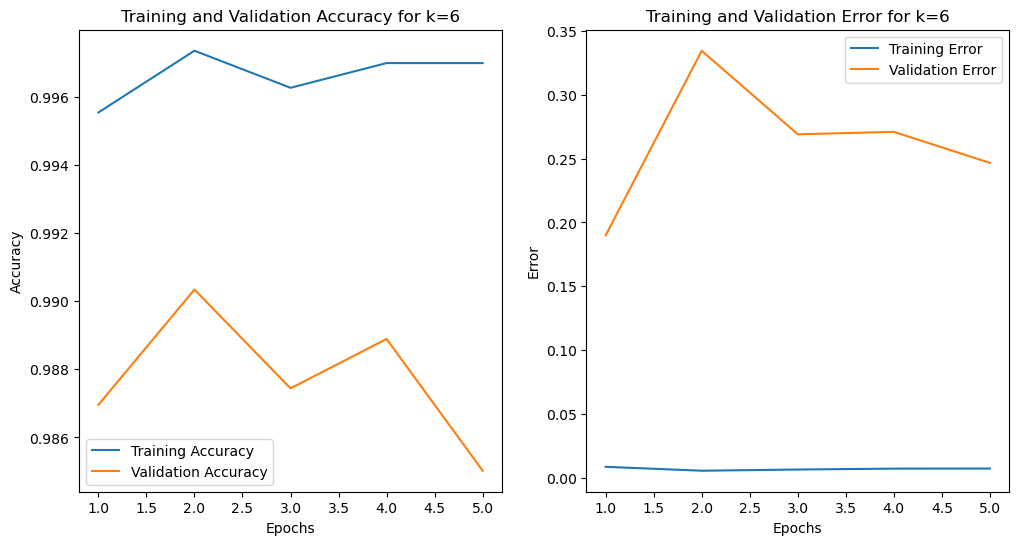

accuracy :  0.9824561403508771

              precision    recall  f1-score   support



           0       0.96      1.00      0.98       246

           1       1.00      0.97      0.98       267



    accuracy                           0.98       513

   macro avg       0.98      0.98      0.98       513

weighted avg       0.98      0.98      0.98       513




	Confusion Matrix:


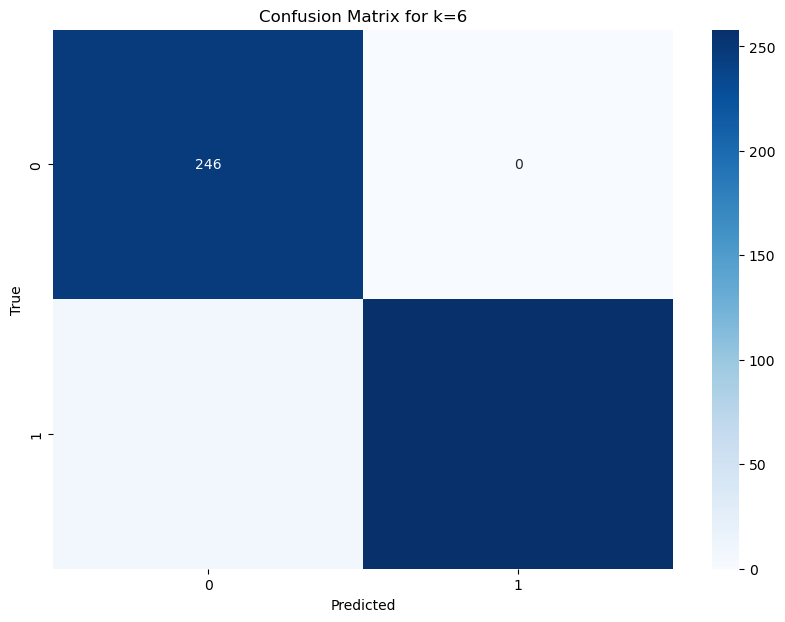


	Save model and vectorizer


In [128]:
def evaluate_kmers_DT(X_train, X_test, y_train, y_test, epochs, patience=3):
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    param_grid = {
        'criterion': ['gini', 'entropy'],            # Measure used to split the data
        'splitter': ['best', 'random'],              # Strategy used to choose the split at each node
        'max_depth': [None, 10, 20, 30, 40, 50],     # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],             # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 5, 10],           # Minimum number of samples required to be at a leaf node
        'max_features': [None, 'sqrt', 'log2'],      # Number of features to consider when looking for the best split
        'class_weight': [None, 'balanced']           # Weights associated with classes
    }
    model = DecisionTreeClassifier(random_state=42)    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_log_loss')

    # Fit the model
    grid_search.fit(X_train, y_train)

    print(f"Best parameters found: {grid_search.best_params_}")
    best_params = grid_search.best_params_

    # Initialize the model with best parameters
    model = DecisionTreeClassifier(**best_params)

    # Cross-validation setup
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    train_accuracy = []
    val_accuracy = []
    train_loss = []
    val_loss = []
    best_val_acc = 0
    patience_counter = 0

    for e in range(epochs):
        print(f"Epoch {e+1}/{epochs}")
        fold_train_acc = []
        fold_val_acc = []
        fold_train_loss = []
        fold_val_loss = []

        for train_index, val_index in skf.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

            model.fit(X_train_fold, y_train_fold)
            y_train_pred = model.predict(X_train_fold)
            y_val_pred = model.predict(X_val_fold)

            train_acc = accuracy_score(y_train_fold, y_train_pred)
            val_acc = accuracy_score(y_val_fold, y_val_pred)

            fold_train_acc.append(train_acc)
            fold_val_acc.append(val_acc)

            y_train_pred_proba = model.predict_proba(X_train_fold)
            y_val_pred_proba = model.predict_proba(X_val_fold)

            train_lo = log_loss(y_train_fold, y_train_pred_proba)
            val_lo = log_loss(y_val_fold, y_val_pred_proba)

            fold_train_loss.append(train_lo)
            fold_val_loss.append(val_lo)

        train_accuracy.append(np.mean(fold_train_acc))
        val_accuracy.append(np.mean(fold_val_acc))
        train_loss.append(np.mean(fold_train_loss))
        val_loss.append(np.mean(fold_val_loss))

        print(f"\tTraining Accuracy: {train_accuracy[-1]:.7f}, Validation Accuracy: {val_accuracy[-1]:.7f}, Training Error: {train_loss[-1]:.7f}, Validation Error: {val_loss[-1]:.7f}")

        # Early Stopping Logic
        if val_accuracy[-1] > best_val_acc:
            best_val_acc = val_accuracy[-1]
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"\tEarly stopping at epoch {e+1}")
            break

    # Ensure same lengths for plotting
    epoch_range = range(1, len(train_accuracy) + 1)

    # Plot training and validation accuracy & loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epoch_range, train_accuracy, label='Training Accuracy')
    plt.plot(epoch_range, val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy for k={k}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epoch_range, train_loss, label='Training Error')
    plt.plot(epoch_range, val_loss, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title(f'Training and Validation Error for k={k}')
    plt.legend()

    plt.show()

    y_test_pred = model.predict(X_test)
    final_score = accuracy_score(y_test, y_test_pred)
    print("accuracy : ", final_score)
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix
    print("========================================================================\n\tConfusion Matrix:")

    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for k={k}')
    plt.show()

    print("========================================================================\n\tSave model and vectorizer")

    dump(model, f"{path}models/classifierDT_tfidf_k={k}.joblib")
    # dump(model, f"{path}models/classifierSVM_CV_k={k}.joblib")


# Example usage:
X_train_concat = pd.concat([sequences_train_final, sequences_val_final])
y_train_concat = pd.concat([y_train, y_val])
evaluate_kmers_DT(X_train_concat, sequences_test_final, y_train_concat, y_test, epochs=30)

#### LazzyClassifier

In [123]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier

# Define the function to evaluate k-mers
def evaluate_kmers_LC(X_train, X_test, y_train, y_test):
    print("===============================================================\nEvaluating model performance")
    
    # Fit the models and get predictions
    print("========================================================================\n=> Fit the models and get predictions")
    classifier = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
    models, predictions = classifier.fit(X_train, X_test, y_train, y_test)

    # Print the model performance
    print("========================================================================\n=> Print the model performance")
    print(models)
    print(predictions)

# Assume sequences_train_final, sequences_val_final, y_train, y_val, sequences_test_final, and y_test are already defined

# Concatenate training and validation data
X_train_concat = pd.concat([sequences_train_final, sequences_val_final])
y_train_concat = pd.concat([y_train, y_val])
X_train_concat1 = X_train_concat.values
y_train_concat1 = y_train_concat.values
sequences_test_final1 = sequences_test_final.values
y_test1 = y_test.values

# Evaluate the models
evaluate_kmers_LC(X_train_concat1, sequences_test_final1, y_train_concat1, y_test1)



Evaluating model performance


=> Fit the models and get predictions


 97%|█████████▋| 28/29 [04:21<00:08,  8.41s/it]

[LightGBM] [Info] Number of positive: 1014, number of negative: 1035

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.532295 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM] [Info] Total Bins 742372

[LightGBM] [Info] Number of data points in the train set: 2049, number of used features: 4089

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494876 -> initscore=-0.020499

[LightGBM] [Info] Start training from score -0.020499

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [04:45<00:00,  9.86s/it]


=> Print the model performance

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \

Model                                                                           

ExtraTreesClassifier               1.00               1.00     1.00      1.00   

PassiveAggressiveClassifier        1.00               1.00     1.00      1.00   

LinearSVC                          1.00               1.00     1.00      1.00   

CalibratedClassifierCV             1.00               1.00     1.00      1.00   

SGDClassifier                      1.00               1.00     1.00      1.00   

Perceptron                         1.00               1.00     1.00      1.00   

LogisticRegression                 1.00               1.00     1.00      1.00   

BaggingClassifier                  1.00               1.00     1.00      1.00   

XGBClassifier                      1.00               1.00     1.00      1.00   

RandomForestClassifier             1.00               1.00     1.

### Deep learning

#### CNN

In [112]:
def evaluateCNN(y_test,y_pred,clf):
    "This function is used to evaluate a model on metrics like accuracy,f1 score,f-0.5 score and confusion matrix "
    print("ACCURACY:", accuracy_score(y_test, y_pred))
    print("F-1 SCORE:", metrics.f1_score(y_test, y_pred,average='weighted'))
    print("F-0.5 SCORE WEIGHTED:", metrics.fbeta_score(y_test, y_pred, average='weighted', beta=0.5))
    print("F-0.5 SCORE MACRO:", metrics.fbeta_score(y_test, y_pred, average='macro', beta=0.5))
    print("F-0.5 SCORE MICRO:", metrics.fbeta_score(y_test, y_pred, average='micro', beta=0.5))
    print(metrics.classification_report(y_test, y_pred))
    print("CONFUSION MATRIX:")
    labels = np.arange(1, 8)
   
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    print(cm)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues')

    # Manually set the tick marks if necessary
    plt.xticks(ticks=np.arange(7), labels=labels)
    plt.yticks(ticks=np.arange(7), labels=labels)
    # disp.plot()
    plt.title(f'Confusion Matrix for k={k}')
    plt.show()
    # Plot the confusion matrix
    
def show_history(history):
    # Plot training & validation accuracy and loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy for k={k}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss for k={k}')
    plt.legend()

    plt.show()

model.summary


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_97 (Conv1D)              │ (None, 123, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_98 (Conv1D)              │ (None, 121, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_60 (MaxPooling1D) │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_99 (Conv1D)              │ (None, 58, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_61 (MaxPooling1D) │ (None, 29, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 29, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_100 (Conv1D)             │ (None, 27, 32)         │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 27, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_62 (MaxPooling1D) │ (None, 13, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_38 (Activation)      │ (None, 13, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_101 (Conv1D)             │ (None, 11, 32)         │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_63 (MaxPooling1D) │ (None, 5, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_39 (Activation)      │ (None, 5, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 5, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 512)            │        82,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 250)            │       128,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 128)            │        32,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276,513 (1.05 MB)

 Trainable params: 276,513 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

None
compile/fit model
Epoch 1/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.1336 - loss: 2.1201 - val_accuracy: 0.1664 - val_loss: 1.9505
Epoch 2/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.1389 - loss: 1.9501 - val_accuracy: 0.1371 - val_loss: 1.9457
Epoch 3/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.1251 - loss: 1.9475 - val_accuracy: 0.1298 - val_loss: 1.9466
Epoch 4/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.1353 - loss: 1.9474 - val_accuracy: 0.1353 - val_loss: 1.9475
Epoch 5/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.1285 - loss: 1.9470 - val_accuracy: 0.1353 - val_loss: 1.9458
Epoch 6/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.1393 - loss: 1.9473 - val_accuracy: 0.1298 - val_loss: 1.9460
Epoch 7/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.1240 - loss: 1.9471 - val_accuracy: 0.1298 - val_loss: 1.9451
Epoch 8/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.1604 - loss: 1.9464 - 

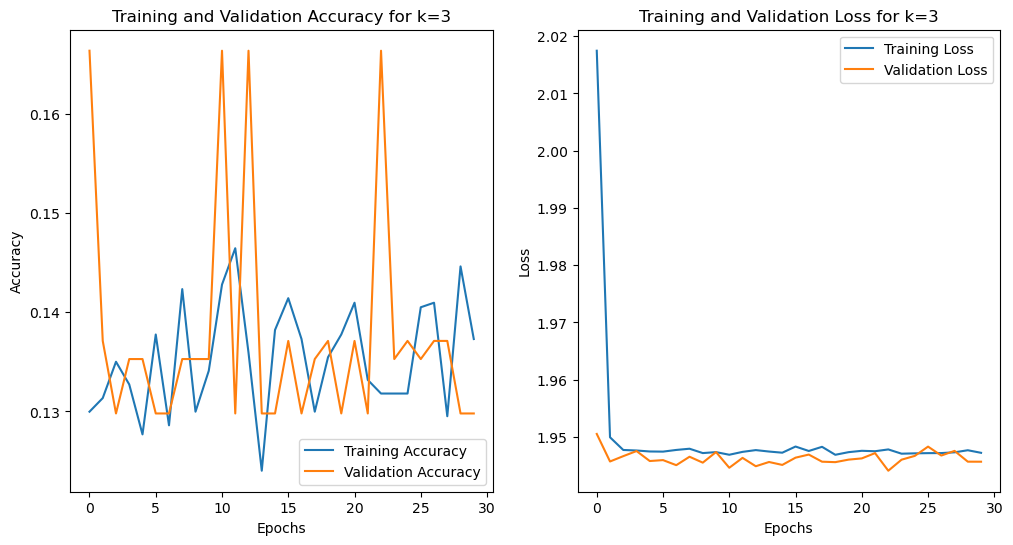

evaluate Model
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
ACCURACY: 0.14327485380116958
F-1 SCORE: 0.03591032141308086
F-0.5 SCORE WEIGHTED: 0.024772293000202224
F-0.5 SCORE MACRO: 0.024700070571630206
F-0.5 SCORE MICRO: 0.14327485380116958
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.00      0.00      0.00       101
           2       0.00      0.00      0.00        83
           3       0.00      0.00      0.00        99
           4       0.14      1.00      0.25        98
           5       0.00      0.00      0.00       107
           6       0.00      0.00      0.00        97

    accuracy                           0.14       684
   macro avg       0.02      0.14      0.04       684
weighted avg       0.02      0.14      0.04       684

CONFUSION MATRIX:
[[  0   0   0 101   0   0   0]
 [  0   0   0  83   0   0   0]
 [  0   0   0  99   0   0   0]
 [  0   0   0  98   0   0   0]
 [  0   0   0 107   0  

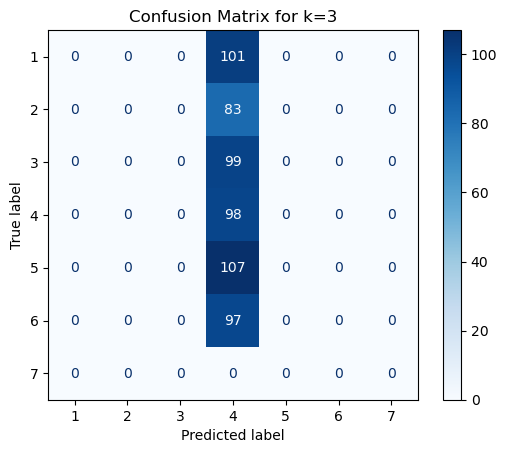

Save model


In [116]:
def CNNmodel(X_train,y_train, X_test,y_test,X_val,y_val,epochs, patience=3):
    model = Sequential()

    # add model layers
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(2))

    model.add(Conv1D(32, 3, activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.5))
    
    model.add(Conv1D(32, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(2))
    model.add(Activation('relu'))
    
    model.add(Conv1D(32, 3))
    model.add(MaxPooling1D(2))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    
    # Flatten before transitioning to Dense layers
    model.add(Flatten())
    
    # Dense layers
    model.add(Dense(512, activation='relu'))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))
    print("========================================================================\nmodel.summary")
    print(model.summary())
    print("========================================================================\ncompile/fit model")

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    # compile model
    optimizer = Adam(learning_rate=0.01)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    x_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    x_test = X_test.reshape(X_test.shape[0], X_train.shape[1], 1)
    x_val = X_val.reshape(X_val.shape[0], X_train.shape[1], 1)
    Y_train = to_categorical(y_train-1, num_classes=len(np.unique(y_train)))
    Y_val = to_categorical(y_val-1, num_classes=len(np.unique(y_train)))
    Y_test = to_categorical(y_test-1, num_classes=len(np.unique(y_train)))
    
    history=model.fit(x_train, Y_train, epochs=epochs, validation_data=(x_val, Y_val))
    print("========================================================================\nPlot de précision et de loss")
    
    show_history(history)
    print("========================================================================\nevaluate Model")
    
    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=-1)
    y_test_classes = Y_test.argmax(axis=-1)
    
    evaluateCNN(y_test_classes, y_pred_classes,model)
    print("========================================================================\nSave model")
    
    model.save(f"{path_model_dl}/model_CNN_{vecto}_k={k}.h5")
    return 
    
CNNmodel(sequences_train.toarray(),y_train, sequences_test.toarray(),y_test,sequences_val.toarray(),y_val,epochs=30)
    

#### CNN & GRU

In [ ]:

#  DNA sequences 
sequences = Labled_data['Sequence']
labels = Labled_data['Label']  
num_classes = len(Labled_data['Category'].unique())

# Label encoding
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Hyperparameters
vocab_size = 4  # A, C, G, T
max_sequence_length = max(len(seq) for seq in sequences)  # Find the length of the longest sequence

# Preprocessing: Convert sequences to one-hot encoded format
def encode_sequence_onehot(seq):
    mapping = {
        'a': [1, 0, 0, 0],
        'c': [0, 1, 0, 0],
        'g': [0, 0, 1, 0],
        't': [0, 0, 0, 1],
    }
    return np.array([mapping[char] for char in seq.lower()])  # Convert to lowercase to match the mapping keys

# Encode sequences
encoded_sequences = [encode_sequence_onehot(seq) for seq in sequences]

# Pad sequences to ensure uniform length
padded_sequences = pad_sequences(encoded_sequences, maxlen=max_sequence_length, padding='post', dtype='float32')

# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.1, random_state=42)

# Build the model
model = Sequential()

# Convolutional layers (embedding is no longer needed since sequences are one-hot encoded)
model.add(Conv1D(filters=27, kernel_size=3, padding='same', activation='relu', input_shape=(max_sequence_length, vocab_size)))
model.add(MaxPooling1D(pool_size=5))

model.add(Dropout(0.2))
model.add(Conv1D(filters=15, kernel_size=2, activation='relu', padding='same'))

# Adjusting the Bidirectional GRU layer
# If the original model had `return_sequences=True`, uncomment the following line
# model.add(Bidirectional(GRU(100, return_sequences=True, input_shape=(None, 4))))
model.add(Bidirectional(GRU(100, input_shape=(None, 4))))  # Use this if return_sequences was False

model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))

# Output Dense layer with softmax activation
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Early stopping to prevent overfitting
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=5, validation_split=0.1, callbacks=[early_stop])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes, target_names=Labled_data['Category'].unique()))

# Plotting accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=Labled_data['Category'].unique(), yticklabels=Labled_data['Category'].unique())
plt.title(f'Confusion Matrix ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### BERT

In [ ]:
MAX_LEN = 512
k=6

In [ ]:
class GPReviewDataset(Dataset):
    # Constructor Function 
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets.astype(int)  # Ensure targets are integers
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    # Length magic method
    def __len__(self):
        return len(self.reviews)
    
    # get item magic method
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]
        
        # Encoded format to be returned 
        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,  # MAX_LEN should be 512 or less
            padding='max_length',  # Pad to the maximum length
            truncation=True,  # Truncate sequences longer than max_length
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
    
    ds = GPReviewDataset(
        reviews=df.Sequence.to_numpy(),
        targets=df.Category.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )
    
    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=0
    )

In [ ]:
def load_model(model_config, return_model=False):
    global model, device, tokenizer

    if torch.cuda.is_available():
        # for CUDA
        torch.cuda.empty_cache()
        device = torch.device("cuda:0")
        print("Running the model on CUDA")

    elif torch.backends.mps.is_available():
        # for M1
        device = torch.device("mps")
        print("Running the model on M1 CPU")

    else:
        print("Running the model on CPU")

    tokenizer = AutoTokenizer.from_pretrained(
        model_config["model_path"], do_lower_case=False
    )

   

    if return_model:
        return  tokenizer



In [ ]:
NUM_CLASSES=len(np.unique(y_train))
model_config = {
    "model_path": f"zhihan1996/DNA_bert_{k}",
    "num_classes": NUM_CLASSES,
}

model, tokenizer, device = load_model(model_config, return_model=True)

In [ ]:
BATCH_SIZE = 16
# label_encoder = LabelEncoder()
all_labels = pd.concat([X_train['Category'], X_val['Category'], X_test['Category']]).unique()

# Fit the LabelEncoder on all unique labels
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

# Transform the labels in each dataset
X_train['Category'] = label_encoder.transform(X_train['Category'])
X_val['Category'] = label_encoder.transform(X_val['Category'])
X_test['Category'] = label_encoder.transform(X_test['Category'])
train_data_loader = create_data_loader(X_train,tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(X_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(X_test, tokenizer, MAX_LEN, BATCH_SIZE)


In [ ]:
class SequencesClassifier(nn.Module):
    def __init__(self, n_classes):
        super(SequencesClassifier, self).__init__()
        # Load the model with a pre-trained classification head
        self.bert = AutoModelForSequenceClassification.from_pretrained(
            f"zhihan1996/DNA_bert_{k}", num_labels=n_classes
        )
        # Dropout layer, if you still want to add some regularization
        self.drop = nn.Dropout(p=0.3)

    def forward(self, input_ids, attention_mask):
        # Get the outputs from BERT (this will be the logits directly)
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        
        # The outputs are the logits from the classification head
        logits = outputs.logits

        # If you want to add dropout, apply it here
        logits = self.drop(logits)

        return logits


In [ ]:
class SequencesClassifier(nn.Module):
    def __init__(self, n_classes):
        super(SequencesClassifier, self).__init__()
        # Load the model with a pre-trained classification head
        self.bert = AutoModelForSequenceClassification.from_pretrained(
            f"zhihan1996/DNA_bert_{k}", num_labels=n_classes
        )
        # Dropout layer, if you still want to add some regularization
        self.drop = nn.Dropout(p=0.3)

    def forward(self, input_ids, attention_mask):
        # Get the outputs from BERT (this will be the logits directly)
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        
        # The outputs are the logits from the classification head
        logits = outputs.logits

        # If you want to add dropout, apply it here
        logits = self.drop(logits)

        return logits


In [ ]:
import torch
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
model = SequencesClassifier(len(y_train.unique()))
model = model.to(device)

In [ ]:
EPOCHS = 5

# Optimizer Adam 
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)

total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Set the loss function 
loss_fn = nn.CrossEntropyLoss().to(device)

In [ ]:
# Function for a single training iteration
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0
    
    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)
        
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)
        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())
        
        # Backward prop
        loss.backward()
        
        # Gradient Descent
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
    
    return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    
    losses = []
    correct_predictions = 0
    
    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)
            
            # Get model ouptuts
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            
            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)
            
            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())
            
    return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
    
    # Show details 
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print("-" * 10)
    
    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(X_train)
    )
    
    print(f"Train loss {train_loss} accuracy {train_acc}")
    
    # Get model performance (accuracy and loss)
    val_acc, val_loss = eval_model(
        model,
        val_data_loader,
        loss_fn,
        device,
        len(X_val)
    )
    
    print(f"Val   loss {val_loss} accuracy {val_acc}")
    print()
    
    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)
    
    # If we beat prev performance
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), f'best_model_state_{k}.bin')
        best_accuracy = val_acc

In [ ]:
train_acc = [t.cpu().numpy() for t in history['train_acc']]
val_acc = [t.cpu().numpy() for t in history['val_acc']]

# Plot training and validation accuracy
plt.plot(train_acc, label='train accuracy')
plt.plot(val_acc, label='validation accuracy')

# Add labels and legend
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title(f'train validation accuracy for k={k}')
plt.legend()
plt.show()

In [ ]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(X_test)
)

test_acc.item()

In [ ]:
def get_predictions(model, data_loader):
    model = model.eval()

    review_texts = []
    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            texts = d["review_text"]
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            # Get outouts
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs, dim=1)

            review_texts.extend(texts)
            predictions.extend(preds)
            prediction_probs.extend(outputs)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()

    return review_texts, predictions, prediction_probs, real_values

y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
    model,
    test_data_loader
)



In [ ]:
print(classification_report(y_test, y_pred, target_names=Labled_data.Category.unique()))

In [ ]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True ')
    plt.xlabel('Predicted ');
    plt.title(f'confusion matrix for k={k}')
    plt.legend()

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=Labled_data.Category.unique(), columns=Labled_data.Category.unique())
show_confusion_matrix(df_cm)